In [3]:
# PROJECT-1
# LEVEL-1
# EDA ON RETAIL SALES DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/shiva/Documents/oasis/retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [2]:

# Descriptive Statistics
desc_stats = df.describe(include='all')

# Time Series Analysis
df['Date'] = pd.to_datetime(df['Date'])
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()

# Customer Analysis
customer_demographics = df.groupby(['Customer ID', 'Gender', 'Age']).agg({
    'Total Amount': ['sum', 'mean', 'count']
}).reset_index()
customer_demographics.columns = ['Customer ID', 'Gender', 'Age', 'Total Spent', 'Average Spending', 'Transaction Count']

# Product Analysis
product_analysis = df.groupby('Product Category').agg({
    'Quantity': 'sum',
    'Total Amount': ['sum', 'mean'],
}).reset_index()
product_analysis.columns = ['Product Category', 'Total Quantity Sold', 'Total Revenue', 'Average Revenue per Transaction']

# Results
results = {
    "Descriptive Statistics": desc_stats,
    "Sales Over Time": sales_over_time,
    "Customer Demographics and Purchasing Behavior": customer_demographics,
    "Product Analysis": product_analysis
}

results


{'Descriptive Statistics':         Transaction ID        Date Customer ID  Gender         Age  \
 count      1000.000000        1000        1000    1000  1000.00000   
 unique             NaN         345        1000       2         NaN   
 top                NaN  2023-05-16     CUST001  Female         NaN   
 freq               NaN          11           1     510         NaN   
 mean        500.500000         NaN         NaN     NaN    41.39200   
 std         288.819436         NaN         NaN     NaN    13.68143   
 min           1.000000         NaN         NaN     NaN    18.00000   
 25%         250.750000         NaN         NaN     NaN    29.00000   
 50%         500.500000         NaN         NaN     NaN    42.00000   
 75%         750.250000         NaN         NaN     NaN    53.00000   
 max        1000.000000         NaN         NaN     NaN    64.00000   
 
        Product Category     Quantity  Price per Unit  Total Amount  
 count              1000  1000.000000     1000.000

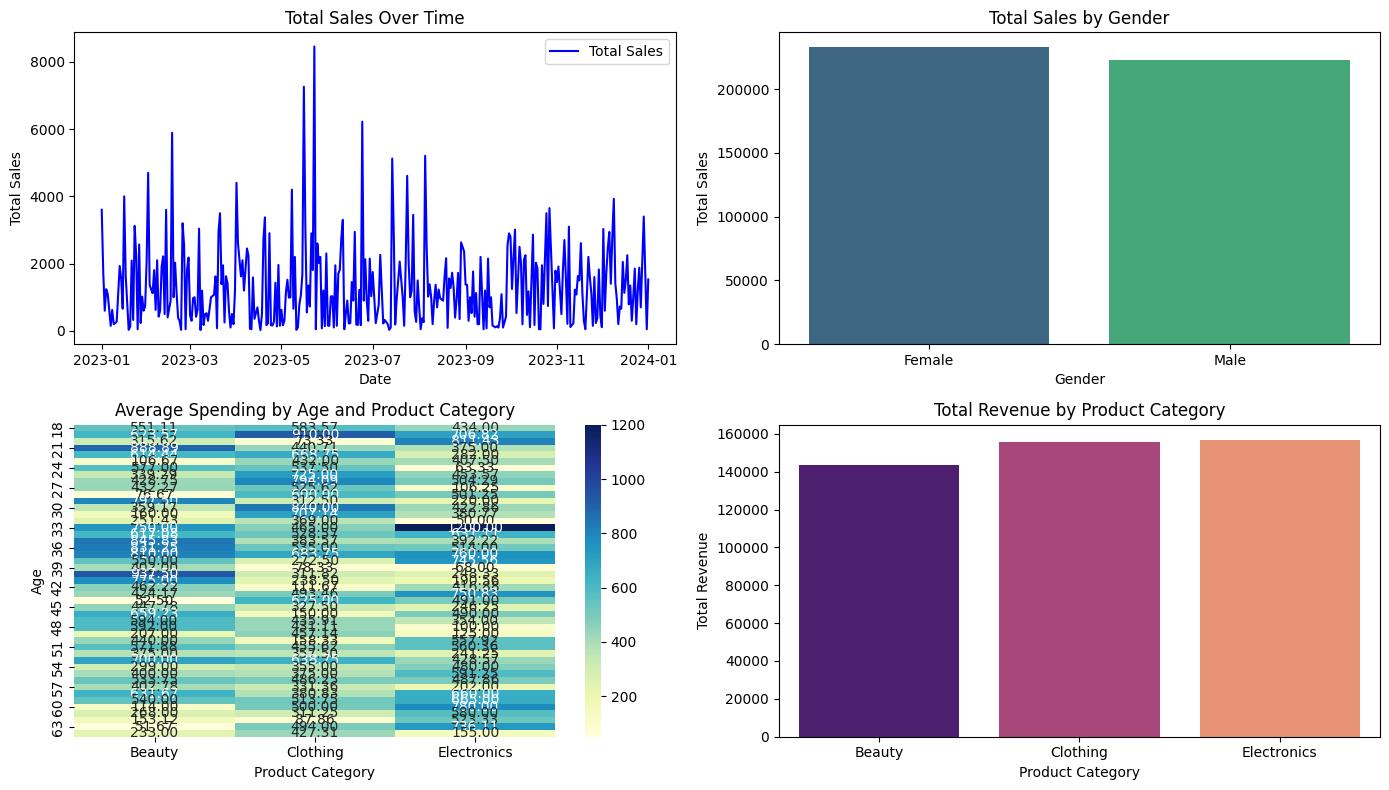

In [4]:
plt.figure(figsize=(14, 8))

# Sales Over Time Line Plot
plt.subplot(2, 2, 1)
plt.plot(sales_over_time['Date'], sales_over_time['Total Amount'], label='Total Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.legend()

# Total Amount by Gender Bar Chart
plt.subplot(2, 2, 2)
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Total Amount', data=gender_sales, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Total Sales by Gender')

# Average Spending by Age Heatmap
plt.subplot(2, 2, 3)
age_spending = df.pivot_table(index='Age', columns='Product Category', values='Total Amount', aggfunc='mean')
sns.heatmap(age_spending, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Spending by Age and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')

# Total Revenue by Product Category Bar Chart
plt.subplot(2, 2, 4)
sns.barplot(x='Product Category', y='Total Revenue', data=product_analysis, palette='magma')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')

plt.tight_layout()
plt.show()


  

In [5]:
recommendations = """
1. **Focus Marketing on High-Spending Age Groups**:
   - Target marketing efforts towards age groups that spend the most on each product category.
   - For instance, specific age groups might spend more on electronics compared to beauty products.

2. **Product Stocking Strategies**:
   - Increase stock and variety of high-revenue product categories such as clothing and beauty products.
   - Consider promoting products that show consistent sales over time.

3. **Personalized Offers**:
   - Develop personalized offers and discounts for loyal customers who have higher transaction counts and average spending.

4. **Gender-Specific Marketing**:
   - Analyze further into gender-specific preferences and tailor marketing campaigns to address the unique preferences and spending patterns of each gender.

5. **Seasonal Promotions**:
   - Identify any seasonal trends in sales data and plan promotions or sales events during peak periods to maximize revenue.

6. **Customer Retention Programs**:
   - Implement loyalty programs to retain high-value customers and encourage repeat purchases.
   - Offer exclusive deals and early access to sales for returning customers.

7. **Optimizing Price Points**:
   - Evaluate the pricing strategy for each product category based on average revenue per transaction and customer response.
   - Test different price points to find the optimal pricing that maximizes sales and profit.
"""

print(recommendations)



1. **Focus Marketing on High-Spending Age Groups**:
   - Target marketing efforts towards age groups that spend the most on each product category.
   - For instance, specific age groups might spend more on electronics compared to beauty products.

2. **Product Stocking Strategies**:
   - Increase stock and variety of high-revenue product categories such as clothing and beauty products.
   - Consider promoting products that show consistent sales over time.

3. **Personalized Offers**:
   - Develop personalized offers and discounts for loyal customers who have higher transaction counts and average spending.

4. **Gender-Specific Marketing**:
   - Analyze further into gender-specific preferences and tailor marketing campaigns to address the unique preferences and spending patterns of each gender.

5. **Seasonal Promotions**:
   - Identify any seasonal trends in sales data and plan promotions or sales events during peak periods to maximize revenue.

6. **Customer Retention Programs**:
   